# Using CNN to classifiy malicious PE files into malware family

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Would you please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


### Get pefiles

In [2]:
!wget https://drive.google.com/uc?id=1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z -O pefiles.pickle

--2020-05-30 16:36:36--  https://drive.google.com/uc?id=1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z
Resolving drive.google.com (drive.google.com)... 66.102.1.102, 66.102.1.101, 66.102.1.138, ...
Connecting to drive.google.com (drive.google.com)|66.102.1.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l3b68b49cfa6kn0esg7q2qecmvbhhfm2/1590856575000/17174434063503717705/*/1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z [following]
--2020-05-30 16:36:36--  https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l3b68b49cfa6kn0esg7q2qecmvbhhfm2/1590856575000/17174434063503717705/*/1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z
Resolving doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting to doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)|74.125.140.132

In [3]:
!ls -al

total 288
drwxr-xr-x 1 root root   4096 May 30 13:29 .
drwxr-xr-x 1 root root   4096 May 30 13:21 ..
drwxr-xr-x 1 root root   4096 May 27 16:27 .config
-rw-r--r-- 1 root root 275871 May 30 16:36 pefiles.pickle
drwxr-xr-x 1 root root   4096 May 27 16:27 sample_data


### load training data

In [0]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd)
  return (tu[0], tu[1])

In [0]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [0]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.

In [7]:
# our data includes 9 different malware families
class_names = ['Loring', 'Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar',
               'Gepys.A', 'Bulta!rfn', 'Tugspay.A', 'Zbot']

len_classes = len(class_names)

print(len_classes)

9


### Explore the data

In [8]:
# We have 348 malware pefiles, and each of them is a 28x28 byte array.
train_images.shape

(348, 28, 28)

In [9]:
# The lenght of the label is 348 as well.
len(train_labels)

348

In [10]:
# Each label is an integer.
# The 1st malware's label is 1.
# It stands for that the 1st malware belongs to 'Loring' family.
# See class_names.
train_labels

array([4, 3, 4, 3, 1, 8, 8, 1, 3, 5, 1, 4, 8, 0, 3, 3, 8, 5, 4, 8, 1, 6,
       4, 8, 4, 1, 2, 0, 8, 3, 1, 1, 2, 4, 1, 4, 4, 1, 8, 5, 6, 1, 4, 3,
       3, 4, 3, 5, 3, 3, 3, 5, 5, 4, 4, 3, 5, 4, 4, 0, 8, 3, 3, 4, 2, 4,
       3, 6, 3, 5, 8, 1, 5, 8, 3, 3, 1, 5, 2, 4, 6, 0, 8, 5, 3, 3, 3, 2,
       5, 3, 4, 6, 6, 1, 5, 8, 3, 4, 4, 3, 3, 8, 1, 3, 3, 3, 3, 5, 4, 2,
       6, 3, 4, 3, 4, 8, 1, 3, 1, 1, 0, 0, 4, 4, 5, 5, 8, 3, 2, 3, 3, 3,
       4, 0, 5, 0, 1, 8, 4, 2, 1, 3, 5, 1, 1, 4, 2, 8, 4, 4, 3, 1, 4, 8,
       4, 4, 3, 4, 0, 5, 4, 3, 3, 8, 6, 4, 4, 0, 8, 3, 4, 5, 3, 4, 5, 1,
       2, 3, 1, 3, 3, 3, 4, 5, 3, 8, 5, 3, 6, 4, 4, 3, 4, 2, 4, 3, 8, 1,
       4, 5, 4, 3, 6, 1, 3, 3, 4, 8, 4, 8, 5, 5, 6, 0, 4, 3, 4, 5, 4, 3,
       3, 3, 4, 3, 4, 5, 3, 4, 8, 3, 5, 1, 5, 1, 3, 1, 2, 4, 0, 3, 1, 1,
       0, 3, 8, 3, 3, 5, 5, 0, 5, 4, 3, 8, 4, 6, 3, 0, 5, 5, 1, 6, 1, 3,
       5, 6, 8, 1, 1, 5, 4, 6, 4, 5, 5, 3, 1, 1, 4, 6, 5, 4, 4, 4, 1, 3,
       6, 4, 8, 8, 4, 8, 3, 1, 1, 2, 1, 6, 3, 4, 3,

In [11]:
# An example of first PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90, 144,   0,   3,   0,   0,   0,   4,   0,   0,   0, 255,
        255,   0,   0, 184,   0,   0,   0,   0,   0,   0,   0,  64,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 248,   0,   0,   0,  14,  31, 186,  14,   0,
        180,   9, 205,  33, 184,   1,  76, 205,  33,  84, 104, 105, 115,
         32, 112],
       [114, 111, 103, 114,  97, 109,  32,  99,  97, 110, 110, 111, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 105, 110,  32,  68,  79,
         83,  32],
       [109, 111, 100, 101,  46,  13,  13,  10,  36,   0,   0,   0,   0,
          0,   0,   0, 165,  63,  53,  94, 225,  94,  91,  13, 225,  94,
         91,  13],
       [225,  94,  91,  13, 142,  40, 240,  13, 228,  94,  91,  13, 250,
        195, 197,  13, 251,  94,  91,  13, 250, 195, 241,  13,  68,  94,
         91,  13],
       [25

### Preprocess the data

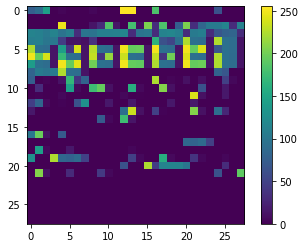

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we view the first 28x28 bytes of a PE file as an image.
# A byte with value '0x00' has darkest color,
# whilw a byte with value '0xFF' has brightest color.
# Below is the visualization of the first PE file.

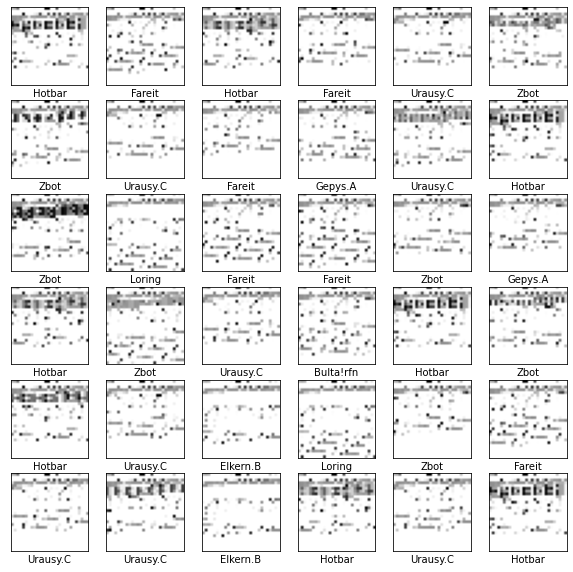

In [13]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [0]:
# 調整 shape
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
# Normalization (Min-Max) (From [0,255] to [0, 1])
train_images = train_images / 255.0

### Build the model

In [0]:
model = tf.keras.models.Sequential([
    # The first and second convolutions
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Max-Pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # The third and forth convolutions
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Max-Pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len_classes, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Q2: Why the example use 'SparseCategoricalCrossentropy' and what is 'from_logits'?

A2: 

因為此題的多元分類是用 index 的方式編碼 label，而非用 one-hot encoding 的方式編碼，而 SparseCategoricalCrossentropy 支援的是 index 的編碼方式，因此使用 SparseCategoricalCrossentropy。

而 from_logits = True 表示的是輸出沒有經過 activation function (ex. sigmoid, softmax)。

### Train the model

In [18]:
# early stop : 若是連續 3 次 epochs 在 validation data 上的 loss 都沒有改善，則會停止訓練
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 訓練模型 (Training data 與 validation data 各為 80% 與 20%。此外，透過 callbacks 呼叫 early stop)
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=20, callbacks=[callback])

Epoch 1/20
9/9 [==============================] - 0s 40ms/step - loss: 1.9872 - accuracy: 0.2266 - val_loss: 1.9503 - val_accuracy: 0.3714
Epoch 2/20
9/9 [==============================] - 0s 9ms/step - loss: 1.6320 - accuracy: 0.4281 - val_loss: 1.5186 - val_accuracy: 0.3571
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 1.2860 - accuracy: 0.5000 - val_loss: 1.6218 - val_accuracy: 0.3714
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 1.0662 - accuracy: 0.5827 - val_loss: 1.0473 - val_accuracy: 0.6429
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 0.8373 - accuracy: 0.7086 - val_loss: 0.9613 - val_accuracy: 0.7143
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.7221 - accuracy: 0.7518 - val_loss: 0.7806 - val_accuracy: 0.7857
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 0.6019 - accuracy: 0.7734 - val_loss: 0.7572 - val_accuracy: 0.7857
Epoch 8/20
9/9 [=================

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


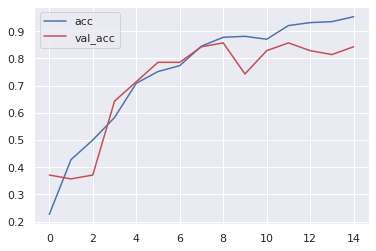

In [19]:
# Training Accuracy 與 Validation Accuracy 的變化
import seaborn as sns
sns.set()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(acc, "b-", label="acc")
plt.plot(val_acc, "r-", label="val_acc")
plt.legend()
plt.show()

Q3: What is 'epochs'? How does it affect the result?

A3: epochs 表示訓練次數，而一次 Forward propagation + Backward propagation 的過程就算是一次訓練。epochs 的次數會影響模型的準確率，若是 epochs 越大，基本上在 training data 上的準確率也會比較高，但相對的 epochs 過多也會造成 overfitting 的問題，導致 testing data 的準確率不高。因此適當評估不同資料集，並透過 try and error 來選擇適當的 epochs 次數才能得到最好的結果。

Q4: What is 'split_validation' in model.fit()? Check it out in tensorflow's web page. Use it in your code.

A4: validation_split 表示的是每次訓練時，都將一小部分的 Training Data 抓出來，不對這些資料進行訓練，並將他們當作 Validation Data。而後在每次訓練 (epochs) 結束時，都使用這一小部分的資料來評估 loss 等數據。

Q5: Could you exaplin the output of model.fit()? And what is your accuracy?

A5: 結果在 Training Data 上的準確率為 95.32%，而在 Validation Data 上的準確率為 84.29%。模型看起來並沒有嚴重的 overfitting 問題，且在 Validation Data 上的準確率也算不錯！

Q6: How do you know your model is not overfitted?

A6: 觀察 Validation Data 的 Accuracy 變化，可以發現隨著訓練次數越多，val_accuracy 並沒有明顯的下滑趨勢，因此可以知道目前模型並沒有發生 overfitting 問題。

Q7: Could you introduce 'early stop mechanism' in your code? Then, train the model again. Does it works?

A7: early stop 表示若是連續多個 epochs 中，某個指標 (ex. val_loss) 都沒有改善，則會停止訓練，因為這表示若再繼續訓練下去很可能會發生 overfitting 問題。將此 callback function 加入模型後，發現模型在訓練到一半的時候便停下了，因為此時的 val_loss 已經連續三個 epochs 都沒有改善，故 early stop 可以防止模型發生 overfitting 問題。

Q8: Any idea of improving the classification accuracy?

A8: 因為目前資料量不多，因此可以透過加入更多的資料，來改善準確率。或者結合 PE File 中的其他 section 部分的特徵進入模型，也許會有更好的預測分類準確率。